# CS251/2: Data Analysis and Visualization

## PCA Applications: Optdigits Numeric Digit Dataset

Spring 2023

Oliver W. Layton

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import palettable
from plots import plotGrid, show_digit

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## Load in Optdigits

CSV filename: `optdigits.csv`

### Format

- 3823 samples
- 64 variables (each image sample is a 8x8 images with one variable per pixel value)
- 65 columns in `optdigits.csv` : last column is the label for the digit in the image (0-9)

In [2]:
digits = np.loadtxt('optdigits.csv', delimiter=',')
digits1D = digits[:, :-1]
labels = digits[:, -1]
print(digits1D.shape)
print(labels.shape)

(3823, 64)
(3823,)


Let's convert each 1D image representation into 2D (reshape) and plot some individual digits

In [3]:
digits2D = np.reshape(digits1D, [digits1D.shape[0], 8, 8])
digits2D.shape

(3823, 8, 8)

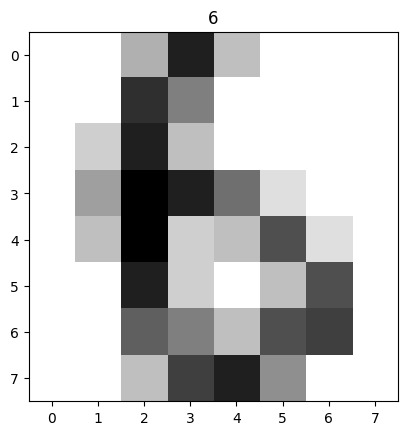

In [9]:
ind = 4
show_digit(digits2D[ind], int(labels[ind]))

Let's plot the 1st 100 digits in a 10x10 grid to get a sense of the data more holistically

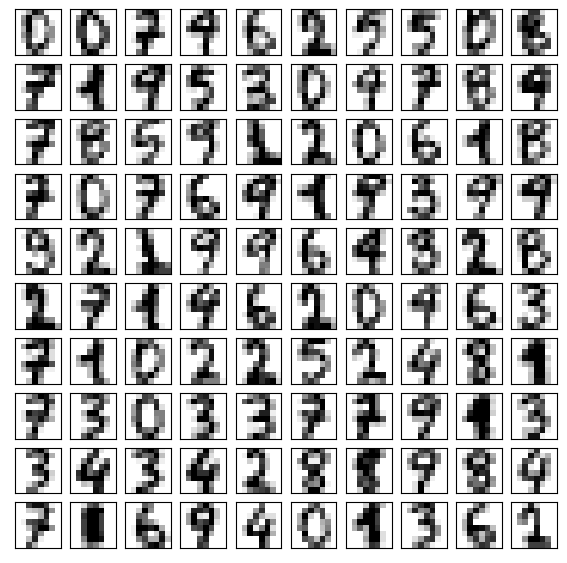

In [10]:
plotGrid(digits2D[:100], numRows=10, numCols=10, figsize=(7,7))

## Run PCA on digit data

#### Let's run PCA on one digit (e.g. 6). How many principal components to we need to accurately represent and reconstruct the handwritten digits?

In [11]:
from pca_cov import PCA_COV

Use **logical indexing** to select image samples whose label is the digit we care about (e.g. 6)

In [16]:
digits1D.shape

(3823, 64)

In [25]:
labels[labels == 6].shape

(377,)

In [24]:
sixes = digits1D[labels == 6]
sixes.shape

(377, 64)

Create a DataFrame to hold the digit data, create a PCA object

In [26]:
digits_ds = pd.DataFrame(data=sixes)
digits_ds.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,14.0,4.0,0.0,0.0,0.0,0.0,0.0,...,12.0,0.0,0.0,0.0,4.0,12.0,14.0,7.0,0.0,0.0
1,0.0,0.0,0.0,10.0,12.0,0.0,0.0,0.0,0.0,0.0,...,14.0,0.0,0.0,0.0,1.0,11.0,14.0,12.0,1.0,0.0
2,0.0,0.0,2.0,14.0,10.0,0.0,0.0,0.0,0.0,1.0,...,15.0,0.0,0.0,0.0,1.0,12.0,14.0,12.0,4.0,0.0
3,0.0,0.0,2.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,0.0,0.0,4.0,15.0,12.0,9.0,1.0,0.0
4,0.0,0.0,2.0,13.0,6.0,0.0,0.0,0.0,0.0,0.0,...,13.0,0.0,0.0,0.0,2.0,12.0,14.0,12.0,4.0,0.0


In [27]:
pca = PCA_COV(digits_ds)

Do we need to normalize? Let's check the global range of the digits

In [29]:
print(np.min(sixes))
print(np.max(sixes))

0.0
16.0


In [28]:
varnames = np.arange(digits_ds.shape[1])
varnames

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

In [30]:
pca.pca(varnames, normalize=True)

Let's run PCA on the digit image vectors then project back from pca space to the data space using the top $k$ PCs so that we can visualize how well those $k$ capture the digit's shape.

Then let's plot and compare the following:
- the image of the mean of all the images of 6s in the dataset
- some reconstructions of the first bunch of samples in the grid
- original images of the 6s in the dataset

(377, 64)
(64,)


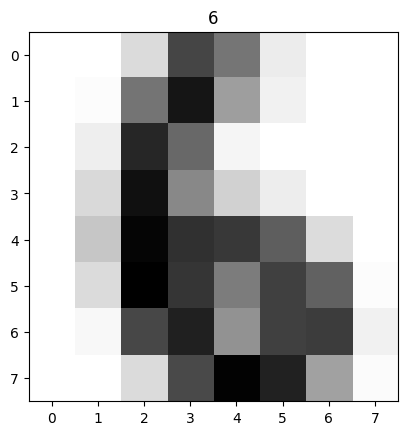

In [36]:
print(sixes.shape)
sixes_mean = np.mean(sixes, axis=0)
print(sixes_mean.shape)
sixes_mean2D = np.reshape(sixes_mean, [8, 8])
show_digit(sixes_mean2D, 6)

(377, 8, 8)


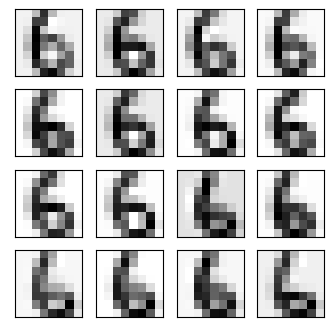

In [48]:
top_k = 5
sixes_rec = pca.pca_then_project_back(top_k)
sixes_rec.shape
sixes_rec_2d = np.reshape(sixes_rec, [sixes_rec.shape[0], 8, 8])
print(sixes_rec_2d.shape)
plotGrid(sixes_rec_2d[:16], numRows=4, numCols=4, figsize=(4,4))

#### Let's visualize the top k PCs themselves (eigenvectors): 

*Remember to transpose e_vecs when plotting as image with imshow*

In [50]:
e_vecs = pca.e_vecs.T
e_vecs2D = np.reshape(e_vecs, [e_vecs.shape[0], 8, 8])

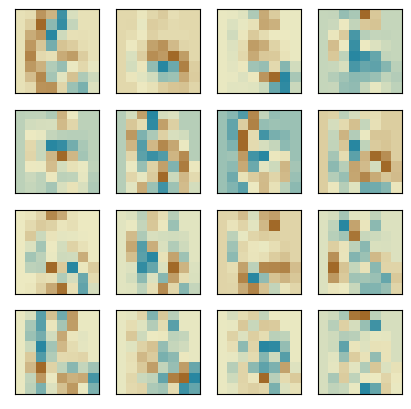

In [53]:
cmap = palettable.cartocolors.diverging.Earth_3.get_mpl_colormap()
plotGrid(e_vecs2D[:16], numRows=4, numCols=4, figsize=(5,5), cmap=cmap)

- orange means values > the mean.
- blue means values < the mean

Each PC shows us a **basis vector**: one key component/part of the digit derived from the data. 

The larger the PC (smaller the PC number; closer to the top left), the more important this component is in accounting for/recreating the 6 digits in the dataset.

**Together, the PCs tell us in a computational sense what it means to be a "6".**
